In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#variables
K = 100
M = 100
X = 1
T = 1
u = np.zeros((K, M))
h = X/M
tau = T/K
x = np.linspace(0, M-1, M)
t = np.linspace(0, K-1, K)

#functions
def f(k, m):
    return k * tau * k * tau * m * h       #f = t^2x
def phi(m):
    return m*m*m*m*h*h*h*h      #phi = x^4
def psi(k):
    return k*tau #psi = t
def fill_layer(k, m):
    if (m != M - 1):
        u[k + 1][m] = f(k, m) * tau + 1/2.*(u[k][m+1] + u[k][m-1]) - tau/2./h * (u[k][m+1] - u[k][m-1])    #центральная явная трехточечная схема
    else:
        u[k + 1][m] = f(k, m) * tau + u[k][m] - tau/h * (u[k][m] - u[k][m-1])      #the explicit left corner

In [3]:
for m in range(M):
    u[0][m] = phi(m)           #initialization when t=0

for k in range(K):
    u[k][0] = psi(k)           #initialization when x=0

for k in range(K - 1):
    for m in range(1, M):
        fill_layer(k, m)   #fill the layer sequentially

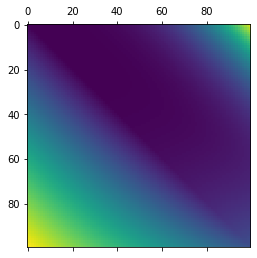

In [4]:
plt.matshow(u)
plt.savefig('graph2d.pdf')

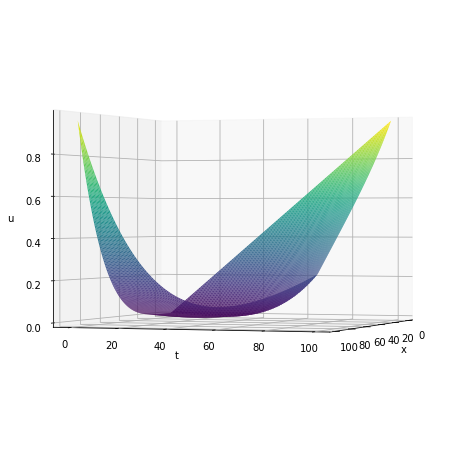

In [8]:
# %matplotlib notebook
fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection='3d')
X, T = np.meshgrid(x, t)
ax.plot_surface(X, T, u, rstride=1, cstride=1, cmap='viridis')
ax.view_init(0, 20)
ax.set_xlabel('х')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.savefig('graph3d.png')